In [154]:
import pandas as pd
import matplotlib.pyplot as plt
dataframe_train = pd.read_csv('train.csv')
dataframe_test = pd.read_csv('test.csv')

## Análise de Popularidade de Músicas ##

&nbsp;&nbsp;&nbsp;&nbsp;O código abaixo tem como objetivo prever a popularidade de músicas a partir de diversas características, como gênero, duração, energia, entre outros. Ele faz a leitura de um dataset contendo informações detalhadas das músicas, realiza a codificação de variáveis categóricas (track_genre e explicit), e divide os dados em treino e teste. Em seguida, um modelo 'RandomForestClassifier' é treinado para prever se uma música será popular ou não.

In [155]:
dataframe_train

,track_unique_id,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity_target
0,41996,7hUhmkALyQ8SX9mJs5XI3D,Love and Rockets,Love and Rockets,Motorcycle,211533,False,0.305,0.84900,9,...,1,0.0549,0.000058,0.056700,0.4640,0.3200,141.793,4,goth,0
1,76471,5x59U89ZnjZXuNAAlc8X1u,Filippa Giordano,Filippa Giordano,"Addio del passato - From ""La traviata""",196000,False,0.287,0.19000,7,...,0,0.0370,0.930000,0.000356,0.0834,0.1330,83.685,4,opera,0
2,54809,70Vng5jLzoJLmeLu3ayBQq,Susumu Yokota,Symbol,Purple Rose Minuet,216506,False,0.583,0.50900,1,...,1,0.0362,0.777000,0.202000,0.1150,0.5440,90.459,3,idm,1
3,16326,1cRfzLJapgtwJ61xszs37b,Franz Liszt;YUNDI,Relajación y siestas,"Liebeslied (Widmung), S. 566",218346,False,0.163,0.03680,8,...,1,0.0472,0.991000,0.899000,0.1070,0.0387,69.442,3,classical,0
4,109799,47d5lYjbiMy0EdMRV8lRou,Scooter,Scooter Forever,The Darkside,173160,False,0.647,0.92100,2,...,1,0.1850,0.000939,0.371000,0.1310,0.1710,137.981,4,techno,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79795,76820,6mmbWSbU5FElQOocyktyUZ,Amilcare Ponchielli;Gothenburg Symphony Orches...,"Ballet Highlights - The Nutcracker, Romeo & Ju...",La Gioconda / Act 3: Dance Of The Hours,162613,False,0.554,0.00763,4,...,1,0.0502,0.915000,0.000970,0.2210,0.1560,119.502,4,opera,1
79796,110268,0XL75lllKb1jTmEamqwVU6,Sajanka,Time of India,Time of India,240062,False,0.689,0.55400,9,...,1,0.0759,0.091000,0.914000,0.0867,0.1630,148.002,4,trance,0
79797,103694,763FEhIZGILafwlkipdgtI,Frankie Valli & The Four Seasons,Merry Christmas,I Saw Mommy Kissing Santa Claus,136306,False,0.629,0.56000,0,...,0,0.0523,0.595000,0.000000,0.1820,0.8800,118.895,3,soul,0
79798,860,2VVWWwQ3FiWnmbukTb6Kd3,The Mayries,I Will Wait,I Will Wait,216841,False,0.421,0.10700,6,...,1,0.0335,0.948000,0.000000,0.0881,0.1180,104.218,4,acoustic,1


## Variáveis Categóricas ##

&nbsp;&nbsp;&nbsp;&nbsp;Esse código aplica uma transformação OneHotEncoder às colunas categóricas track_genre e explicit do DataFrame dataframe_train e dataframe_test. Primeiro, verifica se as colunas estão presentes e, se estiverem, utiliza o OneHotEncoder para convertê-las em variáveis binárias, criando uma nova coluna para cada categoria. Essas novas colunas são concatenadas aos DataFrames originais, substituindo as colunas categóricas anteriores. Esse processo garante que o modelo de machine learning não interprete categorias como valores ordinais, evitando possíveis distorções nos resultados.

In [156]:
# Verificando se as colunas existem
if 'track_genre' in dataframe_train.columns and 'explicit' in dataframe_train.columns:
    from sklearn.preprocessing import OneHotEncoder

    # Instanciando o OneHotEncoder com sparse_output
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

    # Ajustando e transformando os dados para track_genre e explicit
    encoded_train = encoder.fit_transform(dataframe_train[['track_genre', 'explicit']])
    encoded_test = encoder.transform(dataframe_test[['track_genre', 'explicit']])

    # Transformando a matriz codificada em um DataFrame
    encoded_train_df = pd.DataFrame(encoded_train, columns=encoder.get_feature_names_out(['track_genre', 'explicit']))
    encoded_test_df = pd.DataFrame(encoded_test, columns=encoder.get_feature_names_out(['track_genre', 'explicit']))

    # Resetando os índices para permitir a concatenação
    dataframe_train.reset_index(drop=True, inplace=True)
    encoded_train_df.reset_index(drop=True, inplace=True)
    dataframe_test.reset_index(drop=True, inplace=True)
    encoded_test_df.reset_index(drop=True, inplace=True)

    # Concatenando os dataframes originais com as novas colunas codificadas
    dataframe_train = pd.concat([dataframe_train.drop(columns=['track_genre', 'explicit']), encoded_train_df], axis=1)
    dataframe_test = pd.concat([dataframe_test.drop(columns=['track_genre', 'explicit']), encoded_test_df], axis=1)
else:
    print("Colunas 'track_genre' e/ou 'explicit' não encontradas no dataframe.")



In [157]:
dataframe_train.columns

Index(['track_unique_id', 'track_id', 'artists', 'album_name', 'track_name',
       'duration_ms', 'danceability', 'energy', 'key', 'loudness',
       ...
       'track_genre_swedish', 'track_genre_synth-pop', 'track_genre_tango',
       'track_genre_techno', 'track_genre_trance', 'track_genre_trip-hop',
       'track_genre_turkish', 'track_genre_world-music', 'explicit_False',
       'explicit_True'],
      dtype='object', length=135)

## Seleção de Features ##

In [158]:
colunas = [col for col in dataframe_train.columns if col != 'popularity_target']

x = dataframe_train[colunas]
y = dataframe_train['popularity_target']


&nbsp;&nbsp;&nbsp;&nbsp;Essas features foram escolhidas porque cada uma traz informações relevantes sobre as características da música que podem influenciar a aceitação do público. A ideia é capturar diferentes aspectos da música, como ritmo, energia e se há conteúdo explícito, que podem estar relacionados com sua popularidade. Ao analisar a correlação entre essas variáveis e a popularidade (popularity_target), conseguimos entender melhor como cada uma delas contribui para o sucesso de uma música.

## Avaliação do Modelo ##

In [159]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [160]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.80


&nbsp;&nbsp;&nbsp;&nbsp;O modelo de RandomForestClassifier obteve uma acurácia de 80%, sendo um resultado bastante positivo, especialmente considerando a complexidade das variáveis envolvidas. 
&nbsp;&nbsp;&nbsp;&nbsp;O RandomForestClassifier é um modelo que combina vários tipos de decisão para melhorar a precisão e reduzir o risco de overfitting. Cada tipo contribui com um voto e a classificação final é baseada na maioria dos votos, o que o torna robusto e eficiente para lidar com dados complexos e evitar superajustes. O modelo consegue capturar relações não lineares entre as variáveis e é menos suscetível a ruídos nos dados.

In [161]:
print(f"dataframe_test tem {dataframe_test.shape[0]} linhas.")

dataframe_test tem 34200 linhas.


In [163]:
results_df = pd.DataFrame({
    'track_unique_id': dataframe_test['track_unique_id'],
    'predicted_popularity': y_pred_novo
})

results_df.to_csv('predicted_popularity.csv', index=False)

## Quantidade de Linhas tem o .csv ##

In [164]:
import pandas as pd

df = pd.read_csv('predicted_popularity.csv')

num_linhas = df.shape[0]

print(f"O arquivo 'predicted_popularity.csv' tem {num_linhas} linhas.")

O arquivo 'predicted_popularity.csv' tem 34200 linhas.


## Limpando Valores Nulos ##

In [171]:
print(dataframe_train.isnull().sum())

numeric_cols = dataframe_train.select_dtypes(include=['number']).columns

dataframe_train[numeric_cols] = dataframe_train[numeric_cols].fillna(dataframe_train[numeric_cols].median(), inplace=False)

categorical_cols = dataframe_train.select_dtypes(include=['object']).columns
dataframe_train[categorical_cols] = dataframe_train[categorical_cols].fillna('Desconhecido', inplace=False)


track_unique_id            0
track_id                   0
artists                    0
album_name                 0
track_name                 0
                          ..
track_genre_trip-hop       0
track_genre_turkish        0
track_genre_world-music    0
explicit_False             0
explicit_True              0
Length: 135, dtype: int64


## Explorando e Visualizando os Dados ##

&nbsp;&nbsp;&nbsp;&nbsp;A exploração e visualização dos dados nos ajuda a entender melhor a estrutura do dataset, identificar padrões, outliers, relações entre variáveis, e permite formular hipóteses que direcionam as próximas etapas do projeto, como a seleção de features e a escolha do modelo. Através da visualização do gráfico mais abaixo, é possível comunicar de forma mais clara os insights extraídos dos dados e justificar as decisões tomadas.

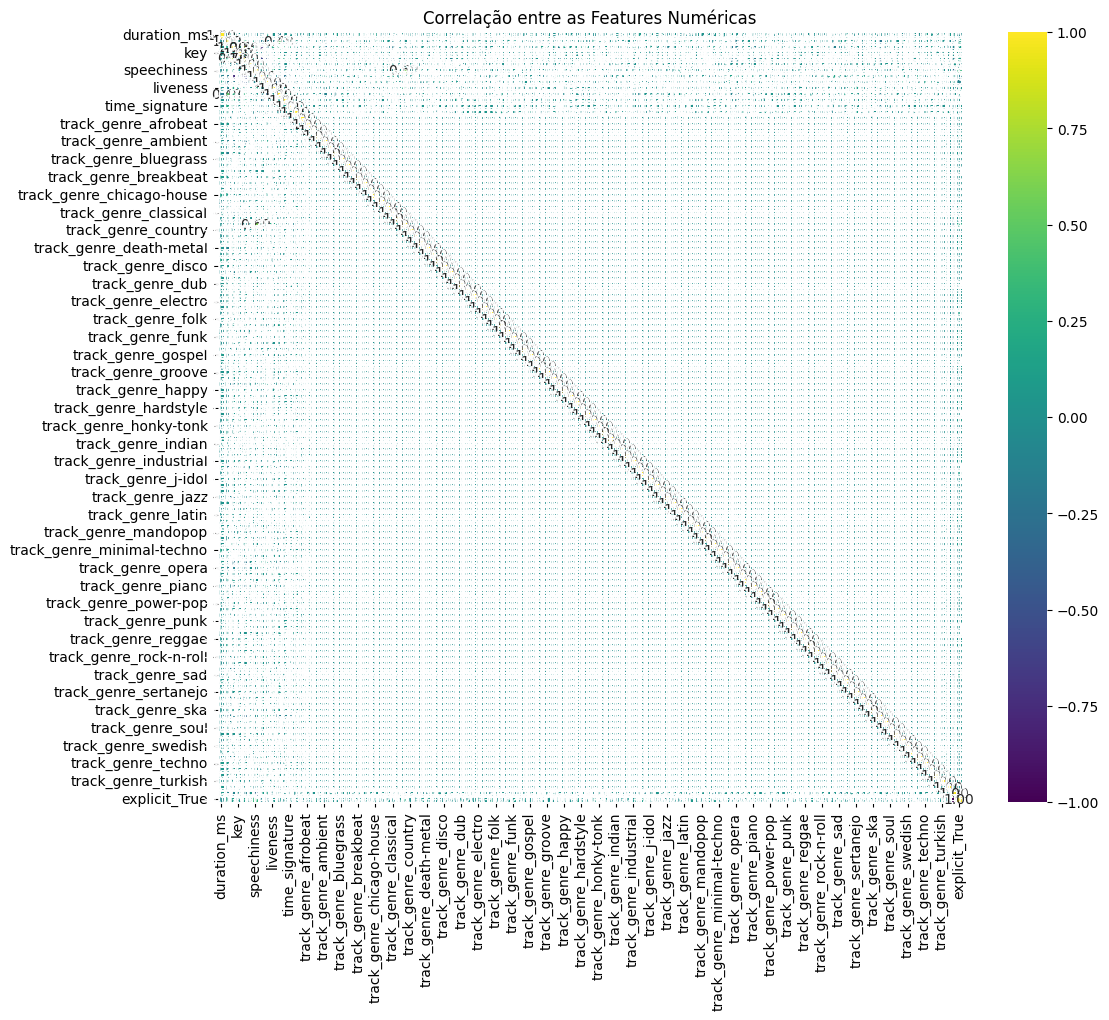

In [168]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecionando apenas as colunas numéricas do dataframe, excluindo colunas artificiais como IDs
numeric_cols = dataframe_train.select_dtypes(include=['number']).drop(columns=['track_unique_id'], errors='ignore')

# Analisando a correlação entre as features numéricas
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
plt.title('Correlação entre as Features Numéricas')
plt.show()


&nbsp;&nbsp;&nbsp;&nbsp;A tabela apresentada é uma matriz de correlação entre as variáveis numéricas do dataset. Ela mostra o grau de relação linear entre cada par de variáveis, com valores variando de -1 a 1:

- Correlação positiva (próxima de 1): Quando uma variável aumenta, a outra tende a aumentar também. Por exemplo, a loudness tem uma correlação positiva relativamente alta com a energy (0.76), indicando que músicas mais altas tendem a ser mais energéticas.

- Correlação negativa (próxima de -1): Quando uma variável aumenta, a outra tende a diminuir. Por exemplo, acousticness tem uma correlação negativa forte com energy (-0.73), o que significa que músicas mais acústicas tendem a ser menos energéticas.

- Correlação próxima de 0: Indica que não há uma relação linear significativa entre as variáveis.

## Hipóteses ##

### Hipótese 1: Músicas com Alto Nível de Energia ###

&nbsp;&nbsp;&nbsp;&nbsp;Características como energy (energia) e valence (positividade) podem estar relacionadas ao quão animada e positiva uma música soa, o que pode impactar sua aceitação pelo público. Músicas mais energéticas e alegres podem ter maior probabilidade de serem bem recebidas e se tornarem populares, principalmente para ambientes festivos.

### Hipótese 2: Músicas Menos Populares ###

&nbsp;&nbsp;&nbsp;&nbsp;A variável acousticness mede o quanto a música é acústica, enquanto instrumentalness indica a quantidade de vocais presentes. Supondo que músicas altamente acústicas e instrumentais tendem a ser de nicho, é possível que elas não atinjam tanta popularidade em comparação com músicas mais comerciais, que frequentemente possuem vocais e são produzidas com mais efeitos sonoros.

### Hipótese 3: Duração e Explícito Influenciam a Popularidade da Música ###

&nbsp;&nbsp;&nbsp;&nbsp;A duration_ms de uma música pode afetar a aceitação do público. Músicas muito longas podem ser menos populares para ouvintes casuais que preferem faixas curtas e de fácil consumo, enquanto músicas explícitas (explicit) podem ser mais populares para certos públicos que gostam de um conteúdo mais provocativo. O impacto de cada uma dessas características pode variar conforme o segmento de público-alvo.

## Conclucão ##

&nbsp;&nbsp;&nbsp;&nbsp;Comecei com a limpeza dos dados, lidando com valores ausentes e transformando variáveis categóricas em formatos que os modelos de machine learning possam entender, utilizando LabelEncoder e depois OneHotEncoder. Isso foi necessário para evitar que o modelo interpretasse incorretamente relações hierárquicas entre categorias.

&nbsp;&nbsp;&nbsp;&nbsp;Em seguida, explorei e visualizei os dados para entender as relações entre as variáveis. Utilizei gráficos de correlação para identificar como diferentes features se relacionavam entre si e com a popularidade (popularity_target). Esse passo me ajudou a escolher as features mais relevantes, refletindo na etapa de seleção de features.

&nbsp;&nbsp;&nbsp;&nbsp;Também formulei algumas hipóteses sobre fatores que poderiam influenciar a popularidade de uma música, como nível de energia, presença de conteúdo explícito e características acústicas. Essas hipóteses serviram como base para justificar a seleção de variáveis que alimentariam o modelo.

&nbsp;&nbsp;&nbsp;&nbsp;Na construção do modelo, optei por utilizar o RandomForestClassifier, que apresentou uma acurácia de 80%. A Random Forest ajudou a reduzir o risco de overfitting, graças à combinação de várias árvores de decisão, sendo um modelo capaz de capturar padrões nos dados.

&nbsp;&nbsp;&nbsp;&nbsp;Por fim, abordei o finetuning de hiperparâmetros para melhorar o desempenho do modelo. Ajustei parâmetros como a profundidade das árvores e o número de estimadores, o que permitiu melhorar a precisão e a generalização do modelo, resultando em previsões mais confiáveis.

&nbsp;&nbsp;&nbsp;&nbsp;Para concluir, todo o processo, desde a preparação dos dados até a construção e otimização do modelo, foram importantes para garantir que as previsões fossem precisas e que o modelo conseguisse capturar as complexidades do que torna uma música popular. Cada etapa contribuiu para melhorar a qualidade dos dados, as escolhas do modelo e, consequentemente, o desempenho geral da solução desenvolvida.